In [331]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
df = pd.read_csv('calidad-aire.csv')

df

,FECHA,HORA,CO_CENTENARIO,NO2_CENTENARIO,PM10_CENTENARIO,CO_CORDOBA,NO2_CORDOBA,PM10_CORDOBA,CO_LA_BOCA,NO2_LA_BOCA,PM10_LA_BOCA,CO_PALERMO,NO2_PALERMO,PM10_PALERMO
0,21NOV2009:00:00:00,8,0.39,17,NaN,s/d,20,NaN,s/d,18,NaN,0.56,NaN,NaN
1,21NOV2009:00:00:00,15,0.68,15,NaN,s/d,20,NaN,s/d,16,NaN,1.04,NaN,NaN
2,21NOV2009:00:00:00,21,0.81,20,NaN,s/d,18,NaN,s/d,23,NaN,1.16,NaN,NaN
3,21NOV2009:00:00:00,22,0.85,21,NaN,s/d,18,NaN,s/d,18,NaN,1.16,NaN,NaN
4,21NOV2009:00:00:00,24,0.93,22,NaN,s/d,15,NaN,s/d,25,NaN,1.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113622,26NOV2009:00:00:00,9,0.69,41,NaN,s/d,s/d,NaN,s/d,19,NaN,0.41,NaN,NaN
113623,18MAY2019:00:00:00,3,0.56,7,17,0.51,8,20,0.24,6,32,NaN,NaN,NaN
113624,03DEC2014:00:00:00,9,0.68,20,35,0.39,22,s/d,s/d,s/d,s/d,NaN,NaN,NaN
113625,03FEB2019:00:00:00,8,0.13,6,33,0.30,33,29,0.28,3,s/d,NaN,NaN,NaN


In [333]:
df['FECHA'].value_counts()

31MAY2019:00:00:00    49
01JUN2019:00:00:00    48
21DEC2021:00:00:00    41
20APR2012:00:00:00    38
22DEC2021:00:00:00    38
                      ..
25MAY2020:00:00:00    12
12FEB2010:00:00:00    12
17SEP2021:00:00:00    12
01OCT2009:00:00:00    11
01FEB2016:00:00:00     1
Name: FECHA, Length: 4770, dtype: int64

In [334]:
df.isnull().sum()

FECHA                   0
HORA                    0
CO_CENTENARIO         242
NO2_CENTENARIO        241
PM10_CENTENARIO     10548
CO_CORDOBA            242
NO2_CORDOBA           241
PM10_CORDOBA        10548
CO_LA_BOCA            239
NO2_LA_BOCA           241
PM10_LA_BOCA        10545
CO_PALERMO         107623
NO2_PALERMO        113627
PM10_PALERMO       113627
dtype: int64

In [335]:
df[df.duplicated()]

,FECHA,HORA,CO_CENTENARIO,NO2_CENTENARIO,PM10_CENTENARIO,CO_CORDOBA,NO2_CORDOBA,PM10_CORDOBA,CO_LA_BOCA,NO2_LA_BOCA,PM10_LA_BOCA,CO_PALERMO,NO2_PALERMO,PM10_PALERMO


In [336]:
df.dtypes

FECHA               object
HORA                 int64
CO_CENTENARIO       object
NO2_CENTENARIO      object
PM10_CENTENARIO     object
CO_CORDOBA          object
NO2_CORDOBA         object
PM10_CORDOBA        object
CO_LA_BOCA          object
NO2_LA_BOCA         object
PM10_LA_BOCA        object
CO_PALERMO          object
NO2_PALERMO        float64
PM10_PALERMO       float64
dtype: object

In [337]:
df['fecha_prep'] = df['FECHA'].str[:9]

df['fecha_prep']

0         21NOV2009
1         21NOV2009
2         21NOV2009
3         21NOV2009
4         21NOV2009
            ...    
113622    26NOV2009
113623    18MAY2019
113624    03DEC2014
113625    03FEB2019
113626    10OCT2018
Name: fecha_prep, Length: 113627, dtype: object

In [338]:
df['year'] = df['fecha_prep'].str[5:]

df['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
113622    2009
113623    2019
113624    2014
113625    2019
113626    2018
Name: year, Length: 113627, dtype: object

In [339]:
df['mes']= df['fecha_prep'].str[2:5]

df['mes']

0         NOV
1         NOV
2         NOV
3         NOV
4         NOV
         ... 
113622    NOV
113623    MAY
113624    DEC
113625    FEB
113626    OCT
Name: mes, Length: 113627, dtype: object

In [340]:
df['dia'] = df['fecha_prep'].str[:2]

df['dia']

0         21
1         21
2         21
3         21
4         21
          ..
113622    26
113623    18
113624    03
113625    03
113626    10
Name: dia, Length: 113627, dtype: object

In [341]:
df_boca =df[['FECHA','CO_LA_BOCA','NO2_LA_BOCA']]
df_boca.isnull().sum()

FECHA            0
CO_LA_BOCA     239
NO2_LA_BOCA    241
dtype: int64

In [342]:
df_centenario = df[['FECHA','CO_CENTENARIO','NO2_CENTENARIO']]
#Columns with null values
df_centenario.isnull().sum()

FECHA               0
CO_CENTENARIO     242
NO2_CENTENARIO    241
dtype: int64

In [343]:
print( "la dimension de df_centenario es:",df_centenario.shape)
print( "la dimension de df_boca es:",df_boca.shape)

la dimension de df_centenario es: (113627, 3)
la dimension de df_boca es: (113627, 3)


In [344]:
#Total of null values
df_centenario.isnull().sum().sum()

483

In [345]:
df_centenario[df_centenario.isnull().any(axis=1)]

,FECHA,CO_CENTENARIO,NO2_CENTENARIO
271,18JAN2010:00:00:00,NaN,NaN
1031,19JAN2011:00:00:00,NaN,NaN
1313,09OCT2010:00:00:00,NaN,NaN
2277,19APR2012:00:00:00,NaN,NaN
2278,19APR2012:00:00:00,NaN,NaN
...,...,...,...
112099,01OCT2018:00:00:00,NaN,NaN
113060,31MAY2019:00:00:00,NaN,NaN
113436,01JUN2019:00:00:00,NaN,NaN
113528,29JAN2020:00:00:00,NaN,NaN


In [346]:
df_boca[df_boca.isnull().any(axis=1)]

,FECHA,CO_LA_BOCA,NO2_LA_BOCA
271,18JAN2010:00:00:00,NaN,NaN
1031,19JAN2011:00:00:00,NaN,NaN
1313,09OCT2010:00:00:00,NaN,NaN
2277,19APR2012:00:00:00,NaN,NaN
2278,19APR2012:00:00:00,NaN,NaN
...,...,...,...
112099,01OCT2018:00:00:00,NaN,NaN
113060,31MAY2019:00:00:00,NaN,NaN
113436,01JUN2019:00:00:00,NaN,NaN
113528,29JAN2020:00:00:00,NaN,NaN


In [347]:
index =df_centenario[df_centenario.isnull().any(axis=1)].index

index_boca =df_centenario[df_centenario.isnull().any(axis=1)].index

In [348]:
df_centenario.drop(index)

,FECHA,CO_CENTENARIO,NO2_CENTENARIO
0,21NOV2009:00:00:00,0.39,17
1,21NOV2009:00:00:00,0.68,15
2,21NOV2009:00:00:00,0.81,20
3,21NOV2009:00:00:00,0.85,21
4,21NOV2009:00:00:00,0.93,22
...,...,...,...
113622,26NOV2009:00:00:00,0.69,41
113623,18MAY2019:00:00:00,0.56,7
113624,03DEC2014:00:00:00,0.68,20
113625,03FEB2019:00:00:00,0.13,6


In [349]:
df_boca.drop(index_boca)

,FECHA,CO_LA_BOCA,NO2_LA_BOCA
0,21NOV2009:00:00:00,s/d,18
1,21NOV2009:00:00:00,s/d,16
2,21NOV2009:00:00:00,s/d,23
3,21NOV2009:00:00:00,s/d,18
4,21NOV2009:00:00:00,s/d,25
...,...,...,...
113622,26NOV2009:00:00:00,s/d,19
113623,18MAY2019:00:00:00,0.24,6
113624,03DEC2014:00:00:00,s/d,s/d
113625,03FEB2019:00:00:00,0.28,3


In [350]:
#df_centenario['fecha_'] =df_centenario['FECHA'].str[:9]

df_centenario.loc[:,'Fecha'] = df_centenario['FECHA'].str[:9]



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [351]:
df_boca.loc[:,'Fecha'] = df_boca['FECHA'].str[:9]

df_boca

,FECHA,CO_LA_BOCA,NO2_LA_BOCA,Fecha
0,21NOV2009:00:00:00,s/d,18,21NOV2009
1,21NOV2009:00:00:00,s/d,16,21NOV2009
2,21NOV2009:00:00:00,s/d,23,21NOV2009
3,21NOV2009:00:00:00,s/d,18,21NOV2009
4,21NOV2009:00:00:00,s/d,25,21NOV2009
...,...,...,...,...
113622,26NOV2009:00:00:00,s/d,19,26NOV2009
113623,18MAY2019:00:00:00,0.24,6,18MAY2019
113624,03DEC2014:00:00:00,s/d,s/d,03DEC2014
113625,03FEB2019:00:00:00,0.28,3,03FEB2019


In [352]:
df_centenario

,FECHA,CO_CENTENARIO,NO2_CENTENARIO,Fecha
0,21NOV2009:00:00:00,0.39,17,21NOV2009
1,21NOV2009:00:00:00,0.68,15,21NOV2009
2,21NOV2009:00:00:00,0.81,20,21NOV2009
3,21NOV2009:00:00:00,0.85,21,21NOV2009
4,21NOV2009:00:00:00,0.93,22,21NOV2009
...,...,...,...,...
113622,26NOV2009:00:00:00,0.69,41,26NOV2009
113623,18MAY2019:00:00:00,0.56,7,18MAY2019
113624,03DEC2014:00:00:00,0.68,20,03DEC2014
113625,03FEB2019:00:00:00,0.13,6,03FEB2019


In [353]:
df_centenario.dtypes

FECHA             object
CO_CENTENARIO     object
NO2_CENTENARIO    object
Fecha             object
dtype: object

In [354]:
df_boca.dtypes

FECHA          object
CO_LA_BOCA     object
NO2_LA_BOCA    object
Fecha          object
dtype: object

In [355]:
df_centenario['CO_CENTENARIO'].value_counts()

s/d      27373
0.40      2109
0.41      2054
0.43      2054
0.44      2051
         ...  
2.36         1
5.04         1
5.14         1
4.68         1
22.38        1
Name: CO_CENTENARIO, Length: 367, dtype: int64

In [356]:
df_centenario['NO2_CENTENARIO'].value_counts()

s/d      21462
17        4212
14        4206
13        4175
15        4160
         ...  
8.00         1
43.00        1
155          1
19.00        1
9.00         1
Name: NO2_CENTENARIO, Length: 119, dtype: int64

In [357]:
df_boca['CO_LA_BOCA'].value_counts()

s/d      30740
<0.05     8666
0.06      1925
0.07      1676
0.25      1633
         ...  
3.91         1
3.61         1
29.27        1
2.93         1
33.41        1
Name: CO_LA_BOCA, Length: 420, dtype: int64

In [358]:
df_boca['NO2_LA_BOCA'].value_counts()

s/d      22934
12        3965
11        3852
10        3798
13        3717
         ...  
32.00        1
25.00        1
103          1
22.00        1
S/d          1
Name: NO2_LA_BOCA, Length: 126, dtype: int64

In [394]:
code = {"s/d": 0}
#df_centenario['NO2_CENTENARIO'] = df_centenario['NO2_CENTENARIO'].map(code)
#df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].map(code)

df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].replace("s/d",0)
df_centenario['NO2_CENTENARIO']=df_centenario['NO2_CENTENARIO'].replace("s/d",0)

df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].replace("S/d",0)
df_boca['NO2_LA_BOCA']=df_boca['NO2_LA_BOCA'].replace("S/d",0)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\2663590604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].replace("s/d",0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\2663590604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['NO2_CENTENARIO']=df_centenario['NO2_CENTENARIO'].replace("s/d",0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\2663590604.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

In [360]:
df_centenario['CO_CENTENARIO'].value_counts()

0        27373
0.40      2109
0.41      2054
0.43      2054
0.44      2051
         ...  
2.36         1
5.04         1
5.14         1
4.68         1
22.38        1
Name: CO_CENTENARIO, Length: 367, dtype: int64

In [361]:
df_boca['CO_LA_BOCA'].value_counts()

0        30740
<0.05     8666
0.06      1925
0.07      1676
0.25      1633
         ...  
3.91         1
3.61         1
29.27        1
2.93         1
33.41        1
Name: CO_LA_BOCA, Length: 420, dtype: int64

In [362]:
df_centenario['CO_CENTENARIO'].isnull().sum()

242

In [363]:
df_centenario['NO2_CENTENARIO'].value_counts()

0        21462
17        4212
14        4206
13        4175
15        4160
         ...  
8.00         1
43.00        1
155          1
19.00        1
9.00         1
Name: NO2_CENTENARIO, Length: 119, dtype: int64

In [364]:
df_centenario['CO_CENTENARIO'].dtypes

dtype('O')

In [365]:
import re

In [366]:
df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].str.extract('(\d+)')





C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\837716351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].str.extract('(\d+)')


In [367]:
df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].str.extract('(\d+)')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\3491770427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].str.extract('(\d+)')


In [368]:
#df_centenario["CO_CENTENARIO"]= df_centenario['CO_CENTENARIO'].str.replace("<", "")

#df_centenario["CO_CENTENARIO"]= df_centenario['CO_CENTENARIO'].str.isdigit()

df_centenario['CO_CENTENARIO'].value_counts()

0     80808
1      4928
2       119
3        22
19       22
22       16
21       10
20       10
18        9
4         5
49        4
5         3
47        3
48        3
38        2
17        2
40        2
30        2
25        2
32        2
16        2
36        1
31        1
35        1
27        1
45        1
24        1
44        1
15        1
42        1
34        1
23        1
14        1
Name: CO_CENTENARIO, dtype: int64

In [369]:
df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].astype(float)
df_centenario['NO2_CENTENARIO']= df_centenario['NO2_CENTENARIO'].astype(float)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\15702454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\15702454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['NO2_CENTENARIO']= df_centenario['NO2_CENTENARIO'].astype(float)


In [395]:
df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].astype(float)
df_boca['NO2_LA_BOCA']=df_boca['NO2_LA_BOCA'].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\393928587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['CO_LA_BOCA']=df_boca['CO_LA_BOCA'].astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\393928587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boca['NO2_LA_BOCA']=df_boca['NO2_LA_BOCA'].astype(float)


In [370]:
df_centenario['CO_CENTENARIO'].value_counts()

0.0     80808
1.0      4928
2.0       119
3.0        22
19.0       22
22.0       16
21.0       10
20.0       10
18.0        9
4.0         5
49.0        4
5.0         3
47.0        3
48.0        3
38.0        2
17.0        2
40.0        2
30.0        2
25.0        2
32.0        2
16.0        2
36.0        1
31.0        1
35.0        1
27.0        1
45.0        1
24.0        1
44.0        1
15.0        1
42.0        1
34.0        1
23.0        1
14.0        1
Name: CO_CENTENARIO, dtype: int64

In [396]:
df_boca['CO_LA_BOCA'].value_counts()

0.0     80043
1.0      2264
2.0       165
3.0        25
31.0       15
32.0       14
34.0       14
35.0       12
27.0       10
37.0        8
4.0         7
25.0        6
36.0        6
29.0        6
33.0        5
30.0        5
28.0        5
24.0        2
26.0        2
44.0        2
38.0        2
14.0        1
10.0        1
40.0        1
39.0        1
18.0        1
22.0        1
Name: CO_LA_BOCA, dtype: int64

In [371]:
df_centenario['CO_CENTENARIO'].isnull().sum()

27639

In [372]:
df_centenario['NO2_CENTENARIO'].value_counts()

0.0      21523
17.0      4213
14.0      4207
13.0      4175
15.0      4161
         ...  
86.0         2
155.0        1
112.0        1
95.0         1
98.0         1
Name: NO2_CENTENARIO, Length: 92, dtype: int64

In [373]:
df_centenario_no2=df_centenario.groupby(['Fecha'])[['NO2_CENTENARIO']].mean().reset_index()

In [398]:
df_boca_no2=df_boca.groupby(['Fecha'])[['NO2_LA_BOCA']].mean().reset_index()

df_boca_no2

,Fecha,NO2_LA_BOCA
0,01APR2010,21.625000
1,01APR2011,53.750000
2,01APR2012,0.000000
3,01APR2013,8.833333
4,01APR2014,10.375000
...,...,...
4765,31OCT2018,12.125000
4766,31OCT2019,26.333333
4767,31OCT2020,12.250000
4768,31OCT2021,3.333333


In [374]:
df_centenario_no2['NO2_CENTENARIO'].isnull().sum()

1

In [375]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

0.000000     718
14.791667     19
13.333333     19
13.416667     18
17.791667     17
            ... 
39.166667      1
24.333333      1
34.875000      1
28.958333      1
42.041667      1
Name: NO2_CENTENARIO, Length: 754, dtype: int64

In [376]:
df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

,Fecha,NO2_CENTENARIO
45,01FEB2016,NaN


In [399]:
df_boca_no2[df_boca_no2.isnull().any(axis=1)]

,Fecha,NO2_LA_BOCA
45,01FEB2016,NaN


In [401]:
df_centenario_no2 = df_centenario_no2[df_centenario_no2['NO2_CENTENARIO']!=0]
df_boca_no2 = df_boca_no2[df_boca_no2['NO2_LA_BOCA']!=0]

In [378]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

14.791667    19
13.333333    19
13.416667    18
17.791667    17
16.083333    17
             ..
33.208333     1
5.000000      1
37.333333     1
32.250000     1
42.041667     1
Name: NO2_CENTENARIO, Length: 753, dtype: int64

In [403]:
df_boca_no2['NO2_LA_BOCA'].value_counts()

14.833333    21
18.666667    17
8.625000     16
10.500000    14
16.583333    14
             ..
39.708333     1
44.041667     1
52.708333     1
32.541667     1
49.166667     1
Name: NO2_LA_BOCA, Length: 917, dtype: int64

In [379]:
df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

,Fecha,NO2_CENTENARIO
45,01FEB2016,NaN


In [404]:
df_boca_no2[df_boca_no2.isnull().any(axis=1)]

,Fecha,NO2_LA_BOCA
45,01FEB2016,NaN


In [405]:
df_centenario_no2=df_centenario_no2.dropna()
df_boca_no2= df_boca_no2.dropna()

In [381]:
df_centenario_no2.isnull().sum()

Fecha             0
NO2_CENTENARIO    0
dtype: int64

In [406]:
df_boca_no2.isnull().sum()

Fecha          0
NO2_LA_BOCA    0
dtype: int64

In [382]:
df_centenario_no2

,Fecha,NO2_CENTENARIO
1,01APR2011,35.541667
2,01APR2012,11.375000
4,01APR2014,12.500000
5,01APR2015,19.958333
6,01APR2016,14.958333
...,...,...
4764,31OCT2017,22.916667
4765,31OCT2018,13.375000
4766,31OCT2019,15.208333
4767,31OCT2020,13.375000


In [383]:
df_centenario_no2['Fecha']= pd.to_datetime(df_centenario_no2['Fecha'])

In [409]:
df_boca_no2['Fecha'] =pd.to_datetime(df_boca_no2['Fecha'])

In [384]:
df_centenario_no2.dtypes

Fecha             datetime64[ns]
NO2_CENTENARIO           float64
dtype: object

In [410]:
df_boca_no2.dtypes

Fecha          datetime64[ns]
NO2_LA_BOCA           float64
dtype: object

In [413]:
df_centenario_no2= df_centenario_no2.sort_values(by='Fecha')

df_centenario_no2

,Fecha,NO2_CENTENARIO,dia,dia_año
131,2009-10-01,34.700000,3,274
289,2009-10-02,30.750000,4,275
603,2009-10-04,23.833333,6,277
761,2009-10-05,29.250000,0,278
919,2009-10-06,24.958333,1,279
...,...,...,...,...
4733,NaT,12.666667,5,91
4740,NaT,19.041667,6,90
4746,NaT,30.333333,3,152
4747,NaT,19.875000,4,151


In [419]:
df_boca_no2= df_boca_no2.sort_values(by='Fecha')

In [386]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

14.791667    19
13.333333    19
13.416667    18
17.791667    17
16.083333    17
             ..
33.208333     1
5.000000      1
37.333333     1
32.250000     1
42.041667     1
Name: NO2_CENTENARIO, Length: 753, dtype: int64

In [415]:
df_centenario_no2 = df_centenario_no2[df_centenario_no2['NO2_CENTENARIO']!=0]

df_boca_no2 = df_boca_no2[df_boca_no2['NO2_LA_BOCA']!=0]

In [417]:
df_centenario_no2

,Fecha,NO2_CENTENARIO,dia,dia_año
131,2009-10-01,34.700000,3,274
289,2009-10-02,30.750000,4,275
603,2009-10-04,23.833333,6,277
761,2009-10-05,29.250000,0,278
919,2009-10-06,24.958333,1,279
...,...,...,...,...
4733,NaT,12.666667,5,91
4740,NaT,19.041667,6,90
4746,NaT,30.333333,3,152
4747,NaT,19.875000,4,151


In [420]:
df_boca_no2

,Fecha,NO2_LA_BOCA
131,2009-10-01,28.000000
289,2009-10-02,35.833333
603,2009-10-04,19.416667
761,2009-10-05,26.125000
919,2009-10-06,16.208333
...,...,...
445,2022-11-03,25.583333
602,2022-11-04,10.791667
760,2022-11-05,8.666667
918,2022-11-06,6.833333


In [427]:
df_centenario_no2

,Fecha,NO2_CENTENARIO,dia,dia_año
131,2009-10-01,34.700000,3.0,274.0
289,2009-10-02,30.750000,4.0,275.0
603,2009-10-04,23.833333,6.0,277.0
761,2009-10-05,29.250000,0.0,278.0
919,2009-10-06,24.958333,1.0,279.0
...,...,...,...,...
4733,NaT,12.666667,NaN,NaN
4740,NaT,19.041667,NaN,NaN
4746,NaT,30.333333,NaN,NaN
4747,NaT,19.875000,NaN,NaN


In [428]:
df_centenario_no2['dia']=pd.to_datetime(df_centenario_no2['Fecha']).dt.day_of_week
df_centenario_no2['dia_año']=pd.to_datetime(df_centenario_no2['Fecha']).dt.day_of_year
df_centenario_no2['mes']=pd.to_datetime(df_centenario_no2['Fecha']).dt.month


df_boca_no2['dia'] =pd.to_datetime(df_boca_no2['Fecha']).dt.day_of_week
df_boca_no2['dia_año'] =pd.to_datetime(df_boca_no2['Fecha']).dt.day_of_year
df_boca_no2['mes'] =pd.to_datetime(df_boca_no2['Fecha']).dt.month

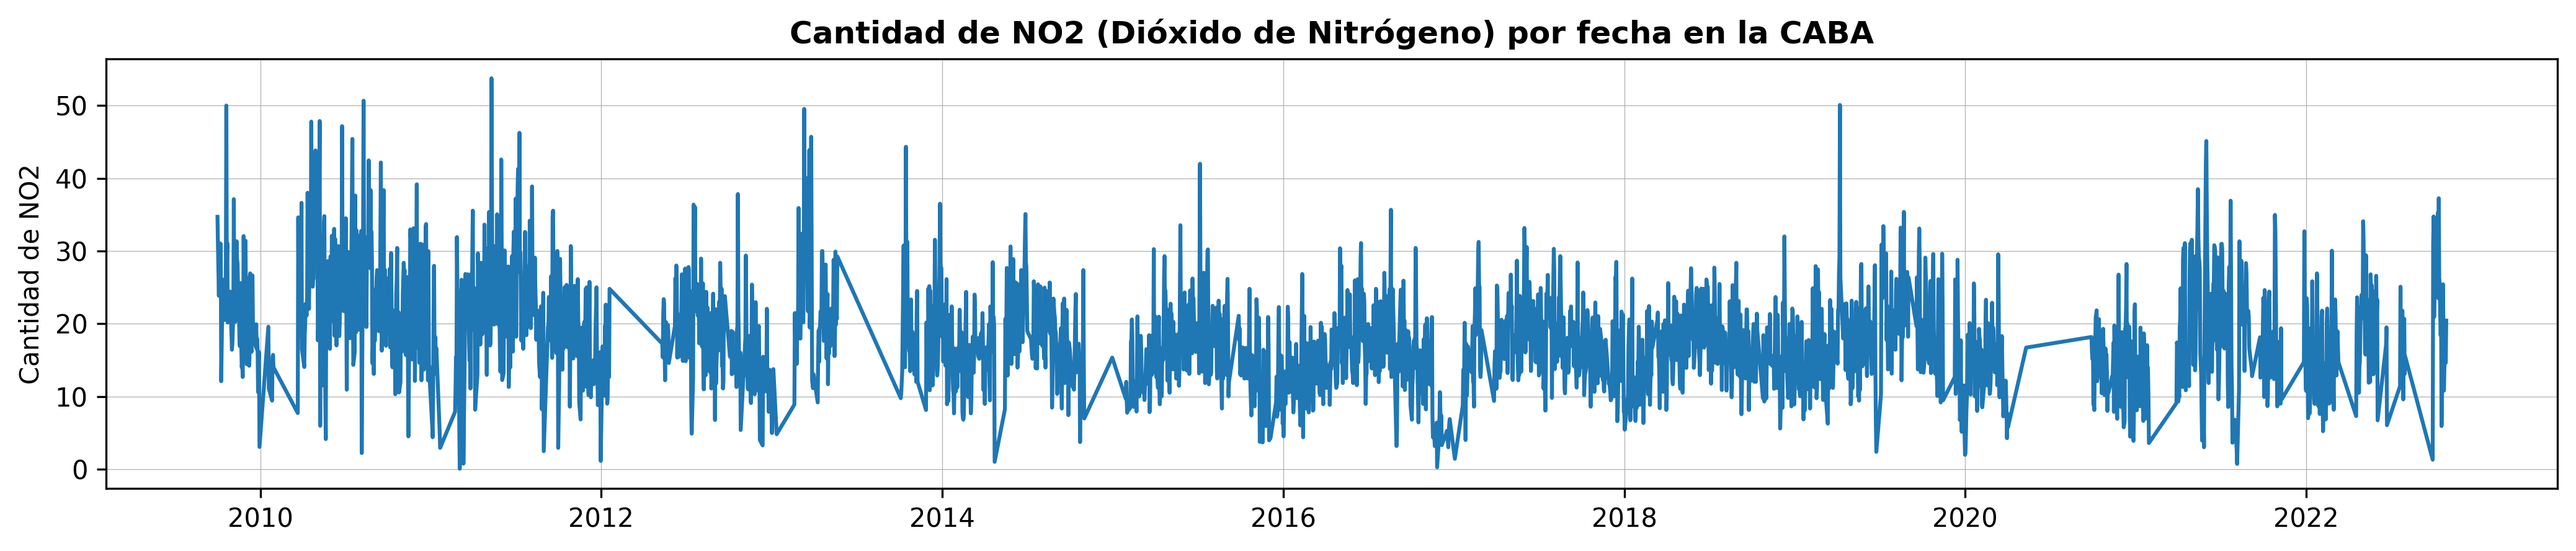

In [424]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la CABA',size=12,weight='bold')
sns.lineplot(data=df_centenario_no2,x='Fecha',y='NO2_CENTENARIO')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

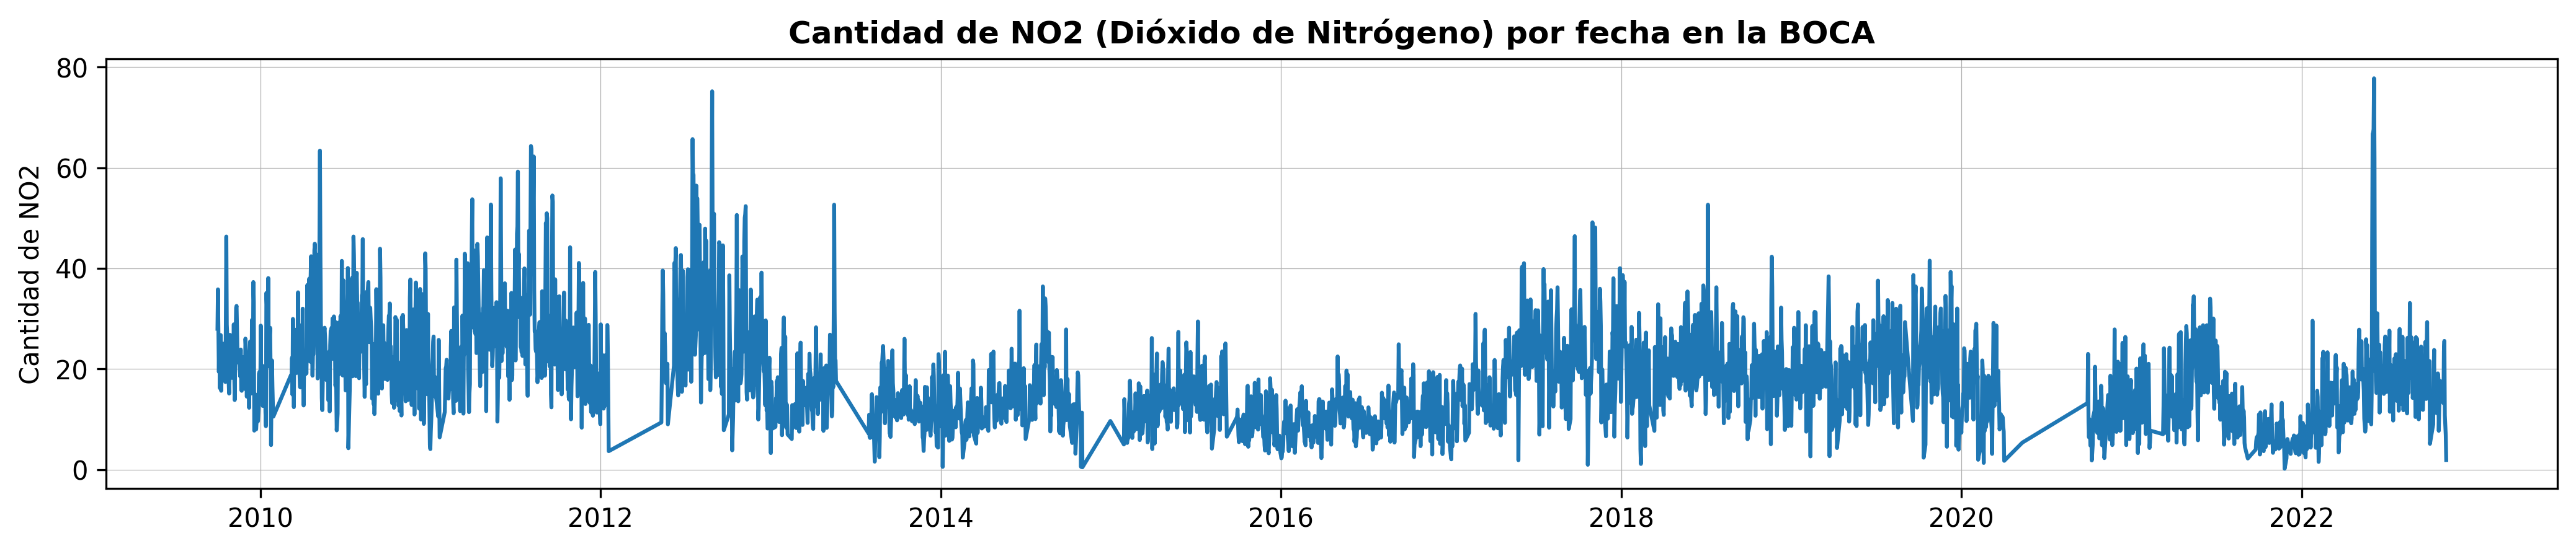

In [423]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la BOCA',size=12,weight='bold')
sns.lineplot(data=df_boca_no2,x='Fecha',y='NO2_LA_BOCA')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

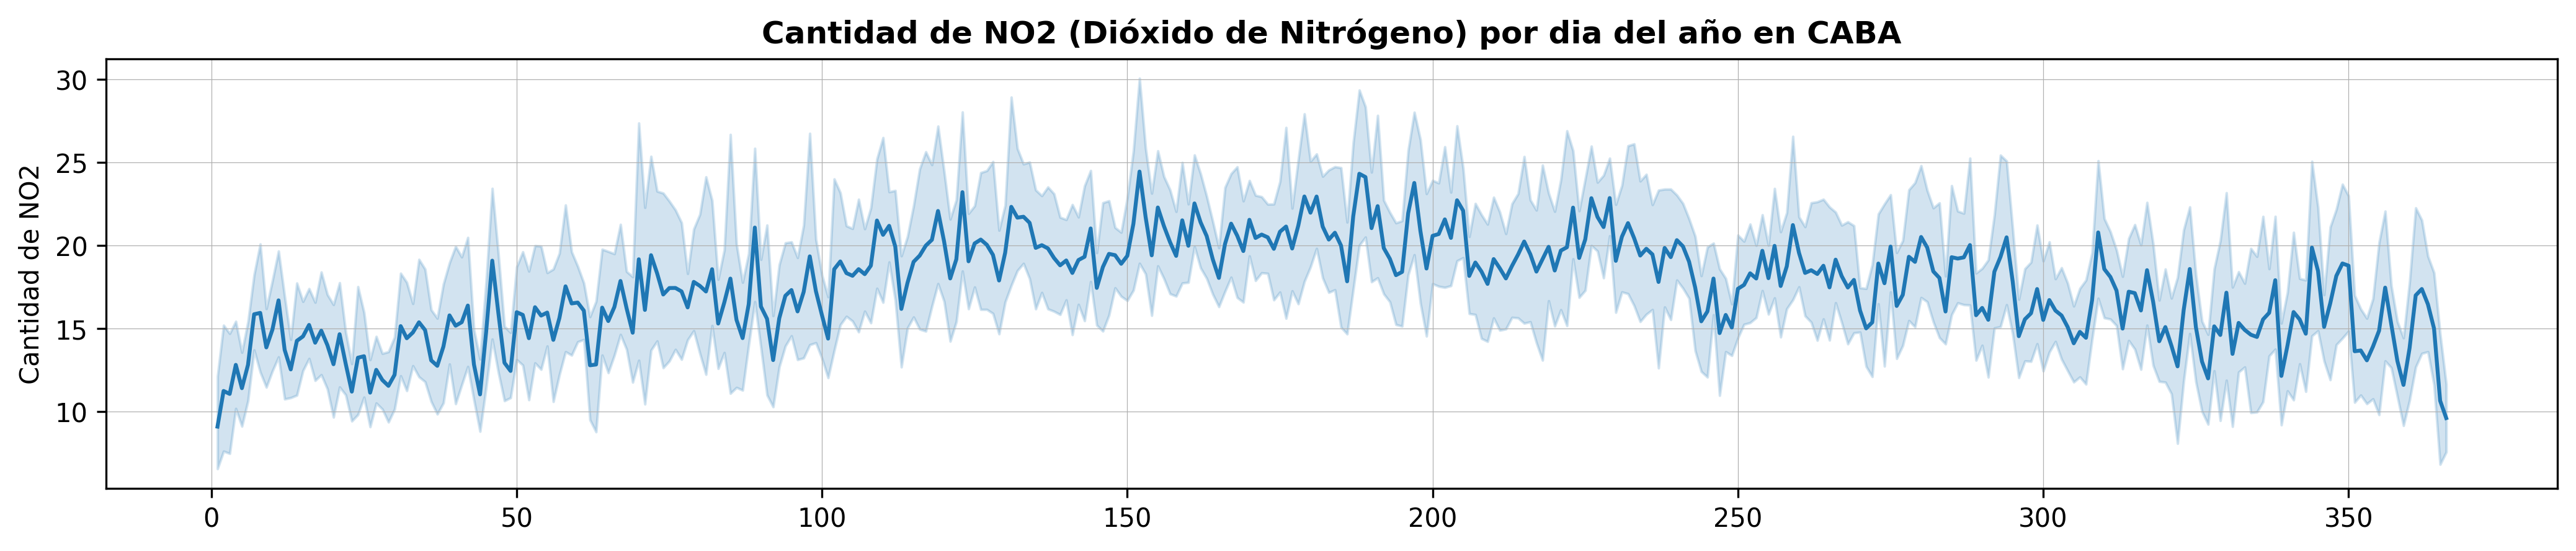

In [391]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por dia del año en CABA',size=12,weight='bold')
sns.lineplot(data=df_centenario_no2,x='dia_año',y='NO2_CENTENARIO')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

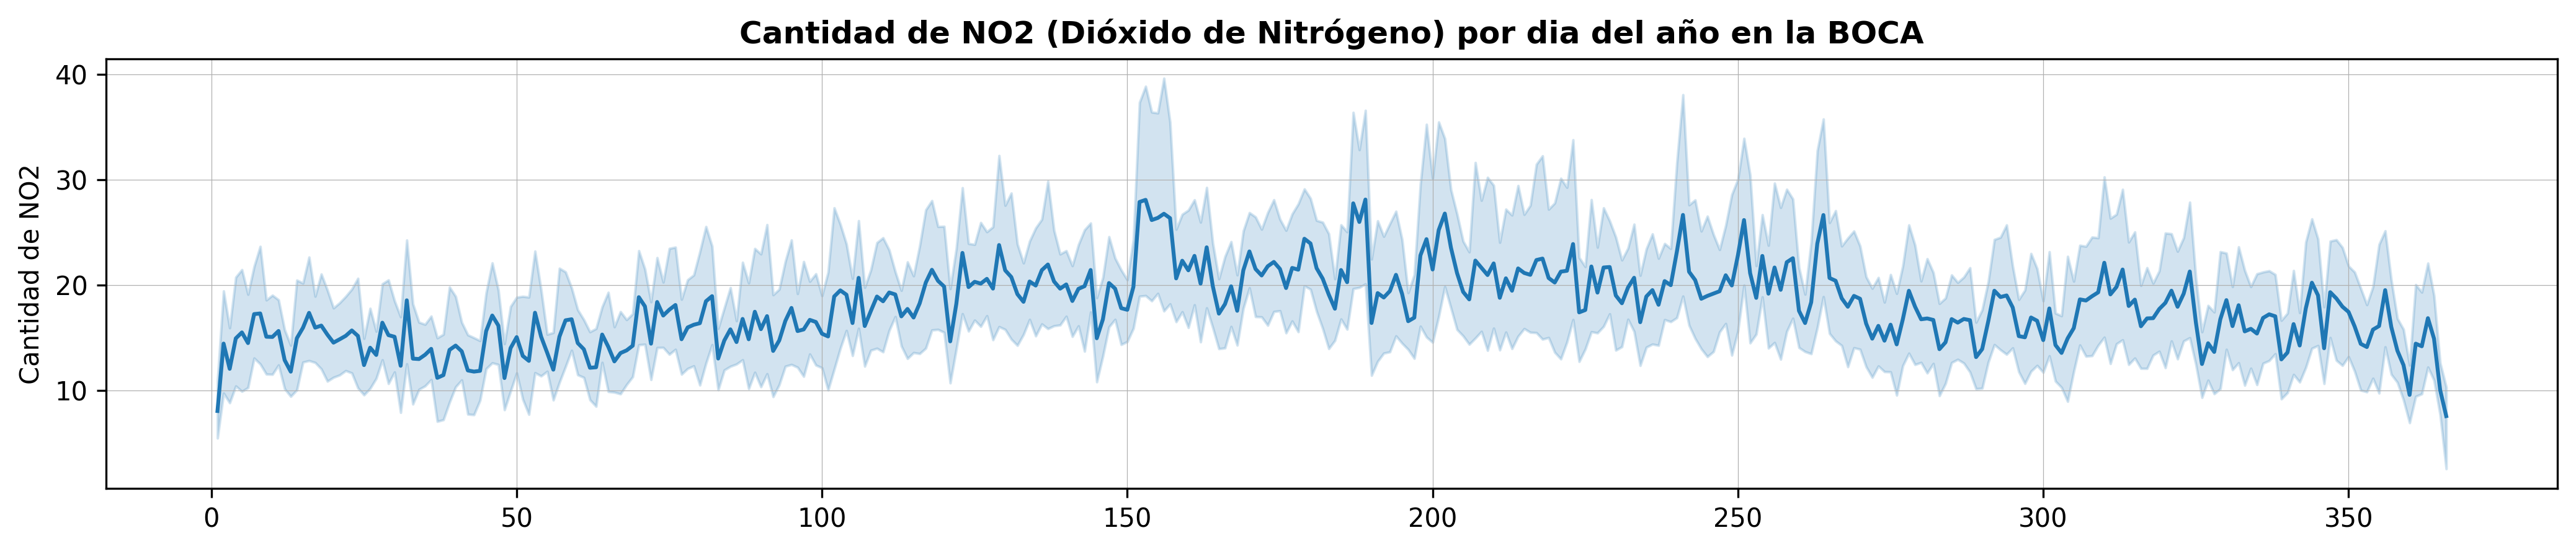

In [425]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por dia del año en la BOCA',size=12,weight='bold')
sns.lineplot(data=df_boca_no2,x='dia_año',y='NO2_LA_BOCA')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

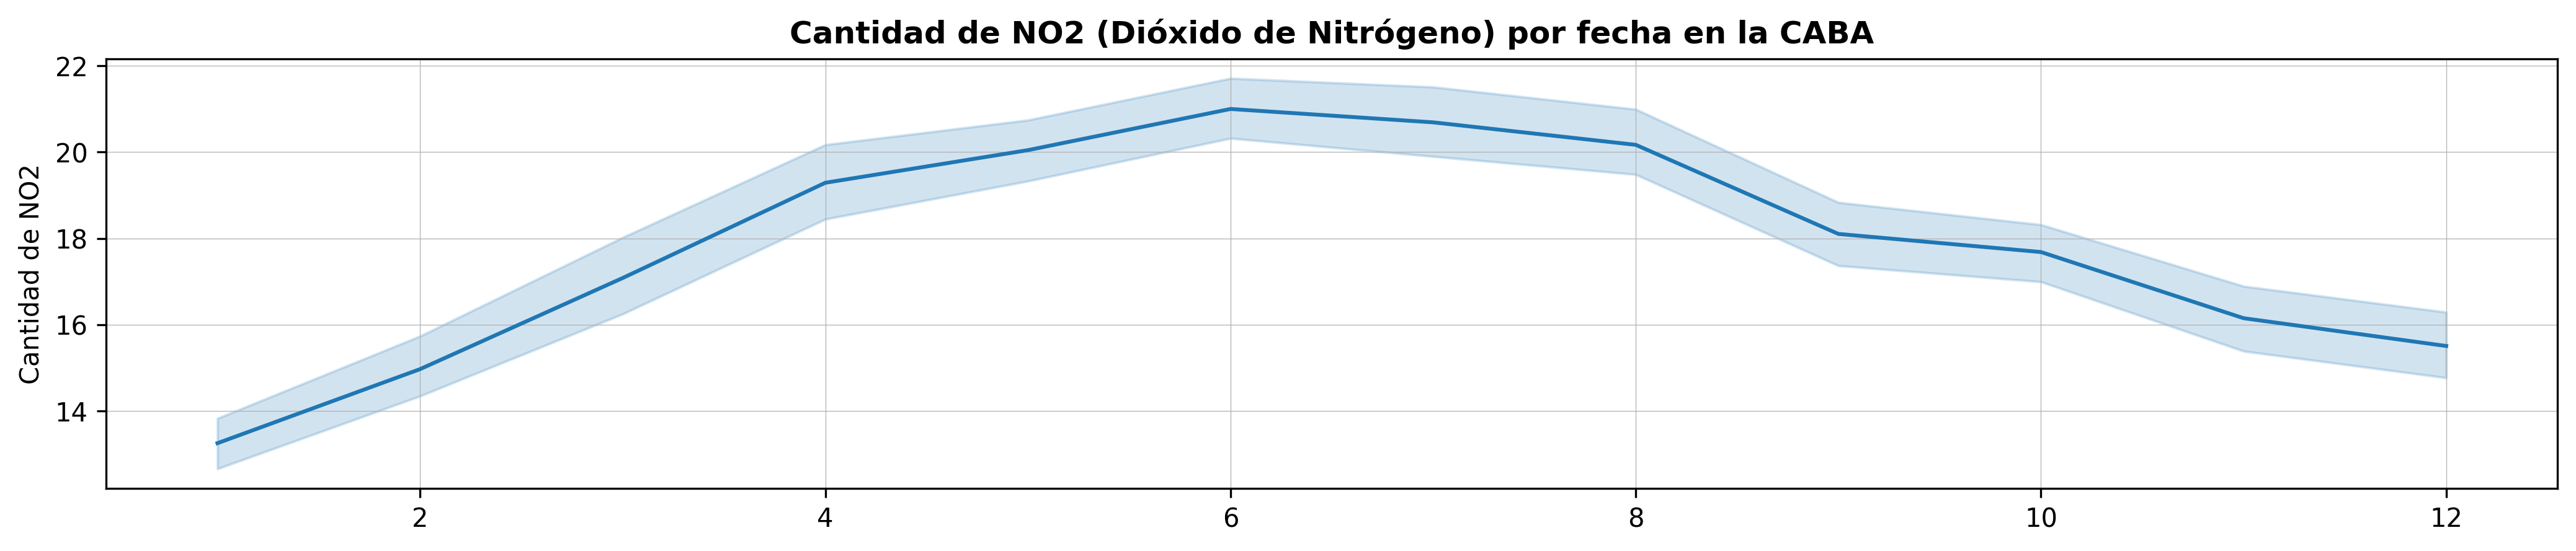

In [429]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la CABA',size=12,weight='bold')
sns.lineplot(data=df_centenario_no2,x='mes',y='NO2_CENTENARIO')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

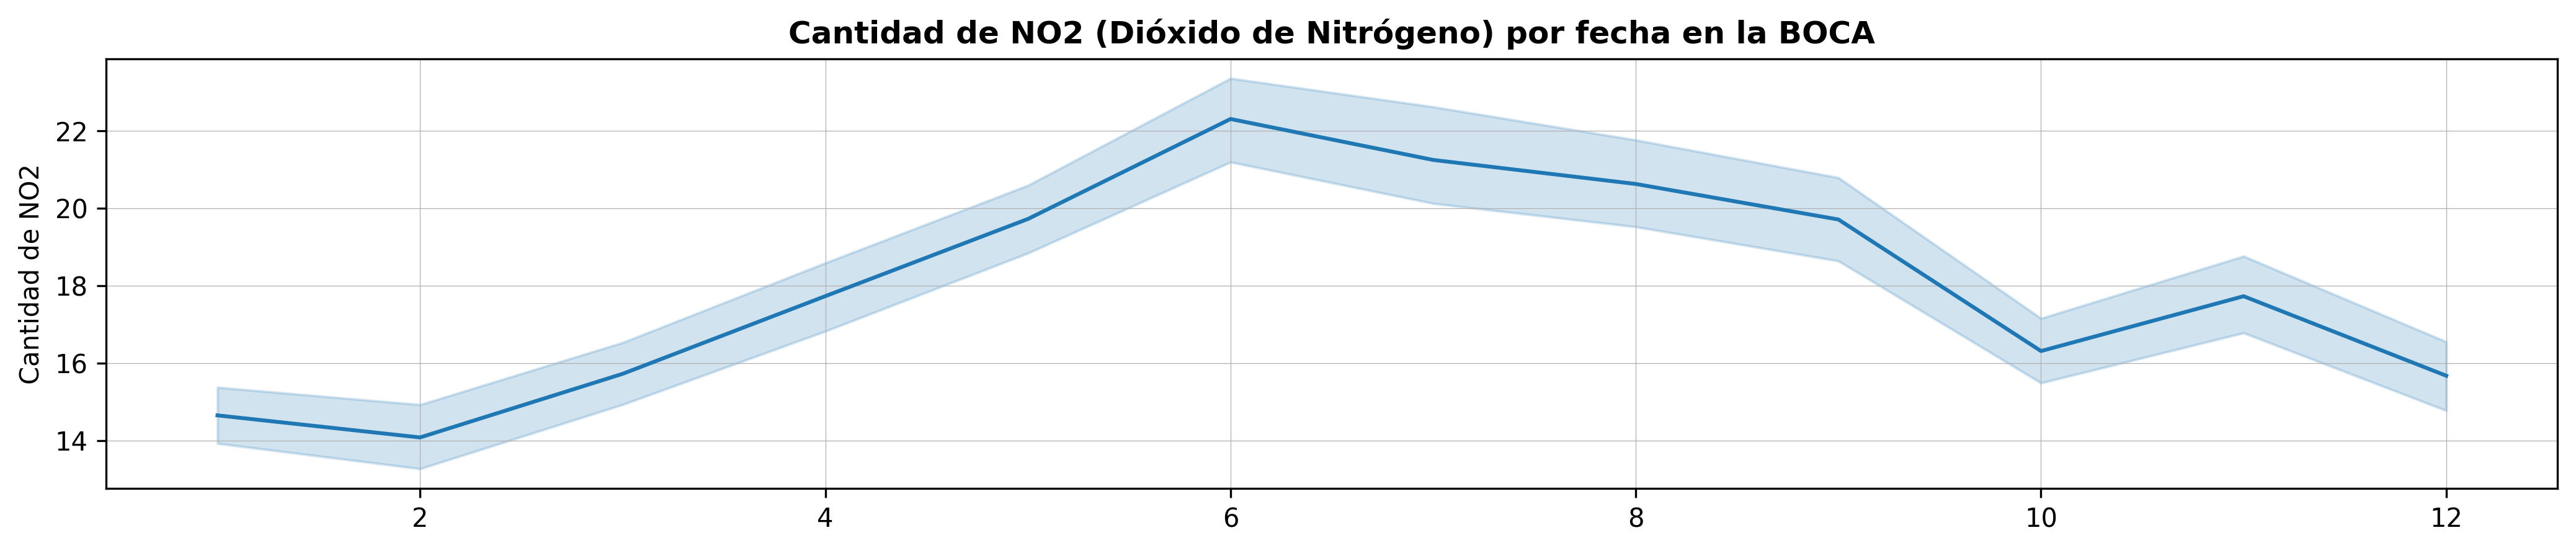

In [430]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la BOCA',size=12,weight='bold')
sns.lineplot(data=df_boca_no2,x='mes',y='NO2_LA_BOCA')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

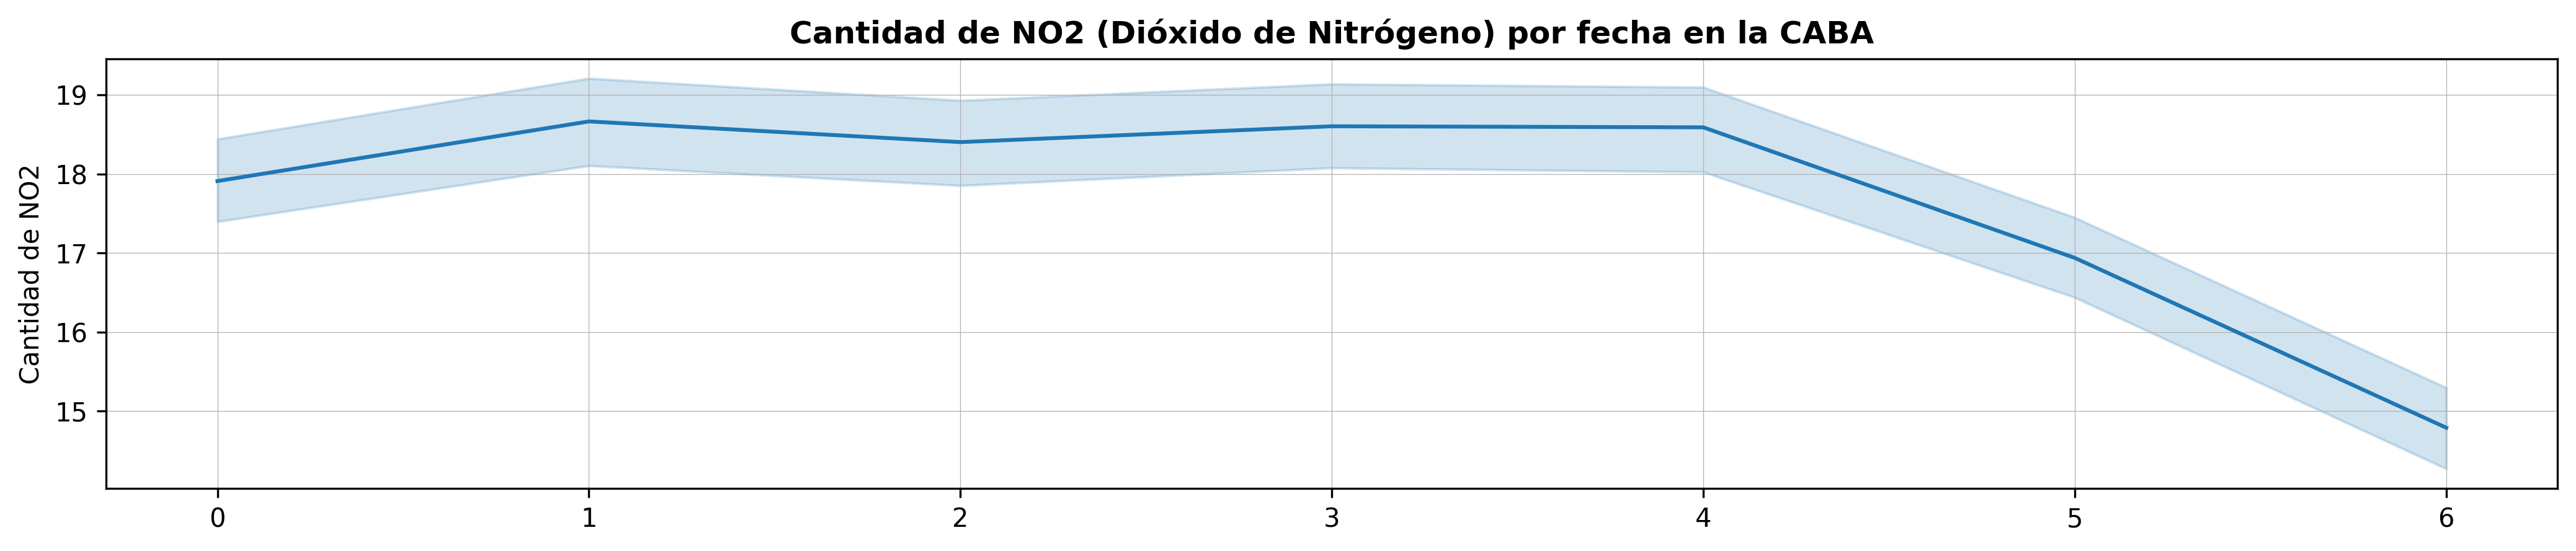

In [ ]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la CABA',size=12,weight='bold')
sns.lineplot(data=df_centenario_no2,x='dia',y='NO2_CENTENARIO')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

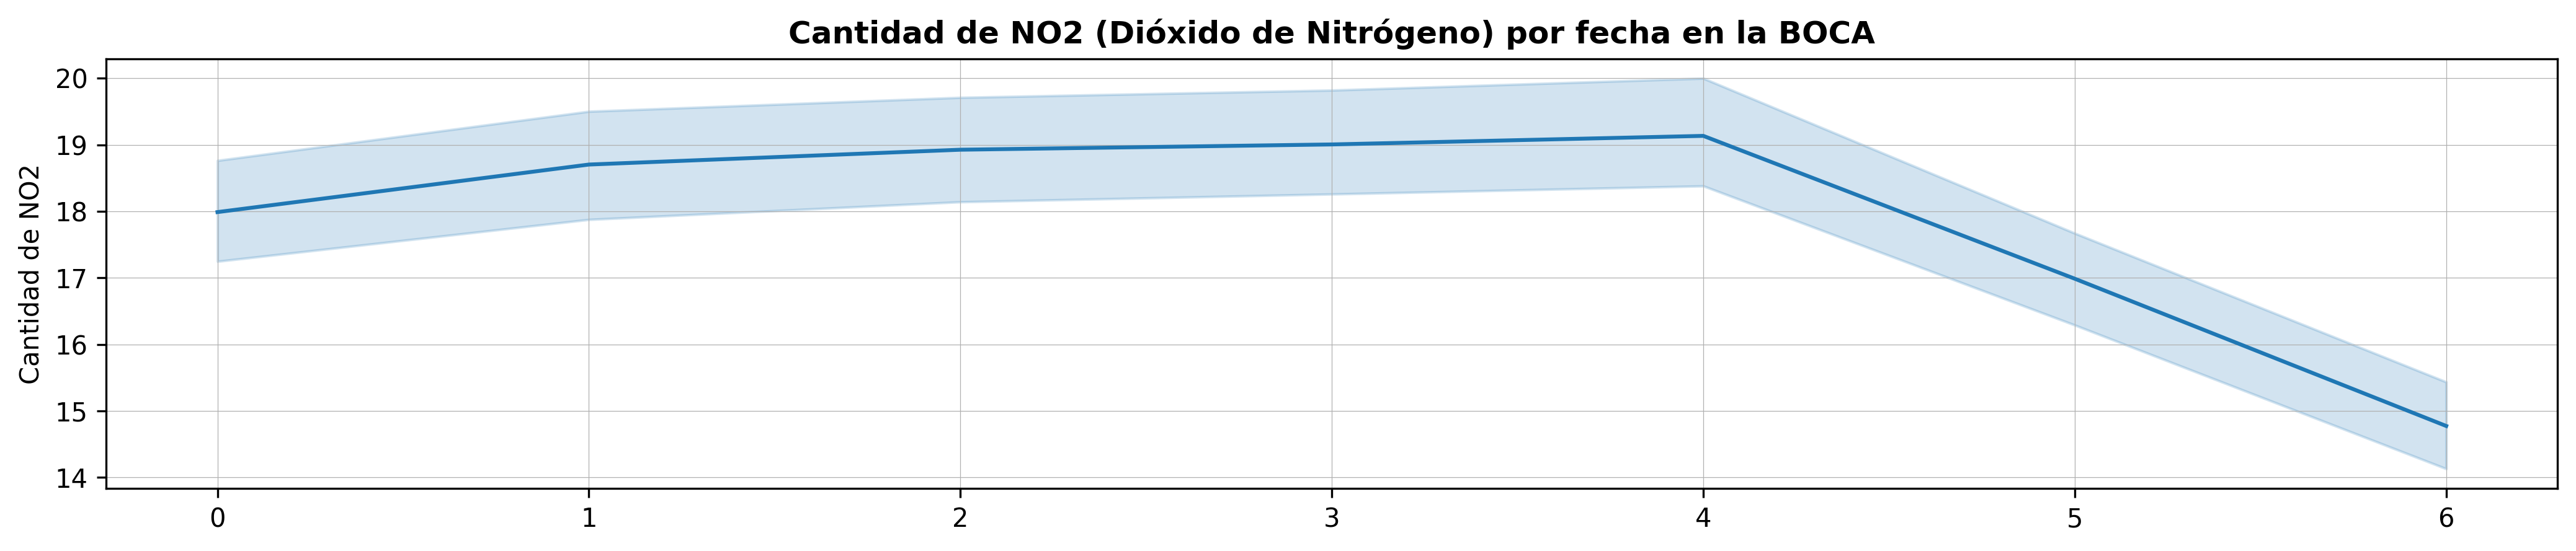

In [431]:
plt.rcParams.update({'figure.figsize':(17,3),'figure.dpi':300})
fig,ax = plt.subplots()
plt.title('Cantidad de NO2 (Dióxido de Nitrógeno) por fecha en la BOCA',size=12,weight='bold')
sns.lineplot(data=df_boca_no2,x='dia',y='NO2_LA_BOCA')
plt.grid(linestyle='-',linewidth=0.3)
ax.set_ylabel('Cantidad de NO2')
ax.set_xlabel(None)
plt.show()

In [ ]:
df_centenario_no2.isnull().sum()

Fecha             0
NO2_CENTENARIO    0
dtype: int64

In [ ]:
df_centenario_no2.dtypes

Fecha             datetime64[ns]
NO2_CENTENARIO           float64
dtype: object

In [ ]:
df_centenario_no2['año'] = df_centenario_no2['Fecha'].astype(str).str[:4]
df_centenario_no2['año']= df_centenario_no2['año'].astype('int64')

df_centenario_no2['mes'] = df_centenario_no2['Fecha'].astype(str).str[5:7]
df_centenario_no2['mes'] = df_centenario_no2['mes'].astype('int64')

df_centenario_no2['dia'] = df_centenario_no2['Fecha'].astype(str).str[8:]
df_centenario_no2['dia'] = df_centenario_no2['dia'].astype('int64')

df_centenario_no2

,Fecha,NO2_CENTENARIO,año,mes,dia
1,2011-04-01,35.541667,2011,4,1
2,2012-04-01,11.375000,2012,4,1
4,2014-04-01,12.500000,2014,4,1
5,2015-04-01,19.958333,2015,4,1
6,2016-04-01,14.958333,2016,4,1
...,...,...,...,...,...
4764,2017-10-31,22.916667,2017,10,31
4765,2018-10-31,13.375000,2018,10,31
4766,2019-10-31,15.208333,2019,10,31
4767,2020-10-31,13.375000,2020,10,31


In [ ]:
df_centenario_no2.value_counts()

Fecha       NO2_CENTENARIO  año   mes  dia
2009-10-01  34.700000       2009  10   1      1
2018-05-04  17.000000       2018  5    4      1
2018-04-21  15.416667       2018  4    21     1
2018-04-22  23.083333       2018  4    22     1
2018-04-23  15.000000       2018  4    23     1
                                             ..
2014-04-22  19.708333       2014  4    22     1
2014-04-23  1.000000        2014  4    23     1
2014-05-15  8.208333        2014  5    15     1
2014-05-16  20.666667       2014  5    16     1
2022-10-30  8.166667        2022  10   30     1
Length: 4051, dtype: int64

In [ ]:
#df_centenario_no2.set_index('Fecha',inplace=True)

In [ ]:
#df_centenario_no2['Lag_1'] = df_centenario_no2.shift(1)


In [ ]:
#df_centenario_no2

In [ ]:
#df_centenario_no2.drop(index='2011-04-01')

In [ ]:
#df_centenario_no2.isnull().sum()

In [ ]:


#df_centenario_no2= df_centenario_no2.dropna()

#df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

In [ ]:
#y = df_centenario_no2['NO2_CENTENARIO']
#X= df_centenario_no2[['Lag_1']]

In [ ]:
X = df_centenario_no2[['año','mes','dia']]
y = df_centenario_no2['NO2_CENTENARIO']

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2835, 3)
(1216, 3)
(2835,)
(1216,)


In [ ]:
#model = HistGradientBoostingRegressor(  max_depth = 7, random_state = 18)
#model.fit(X_train,y_train)

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())

año    0
mes    0
dia    0
dtype: int64
0
año    0
mes    0
dia    0
dtype: int64


In [ ]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [ ]:
#pickle file
pickle.dump(rf,open("model.pkl","wb"))

In [ ]:
y_pred = pd.Series(rf.predict(X_test), index=X_test.index)

In [ ]:
rf.predict(X_test)

array([18.48448972, 18.12795533, 24.10694211, ..., 26.90697188,
       19.42021886, 16.61768148])

In [ ]:
X_test

,año,mes,dia
3371,2022,7,22
179,2018,8,2
2432,2010,6,16
2871,2019,2,19
3810,2017,2,25
...,...,...,...
1307,2017,2,9
226,2013,7,2
4390,2010,4,29
2798,2011,10,18


In [ ]:
rf.predict([[2014,3,3]])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.94846044])

In [ ]:
#fig, ax = plt.subplots()
#ax.plot(X_test['Lag_1'], y_test, '.', color='0.25')
#ax.plot(X_test['Lag_1'], y_pred)
#ax.set_aspect('equal')
#ax.set_ylabel('NumVehicles')
#ax.set_xlabel('Lag_1')
#ax.set_title('Lag Plot of Tunnel Traffic');